Importing libraries

In [55]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras import regularizers
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

## 1. Model creation using the existing model from the use case

In [56]:
# Set random seed for purposes of reproducibility
seed = 21

In this example, we will be using the famous CIFAR-10 dataset. CIFAR-10 is a large image dataset containing over 60,000 images representing 10 different classes of objects like cats, planes, and cars.

The images are full-color RGB, but they are fairly small, only 32 x 32. One great thing about the CIFAR-10 dataset is that it comes prepackaged with Keras, so it is very easy to load up the dataset and the images need very little preprocessing.

We're going to be using a random seed here so that the results achieved in this ICP can be replicated by you,

### Loading the data

In [57]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [58]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### Visualize the data

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

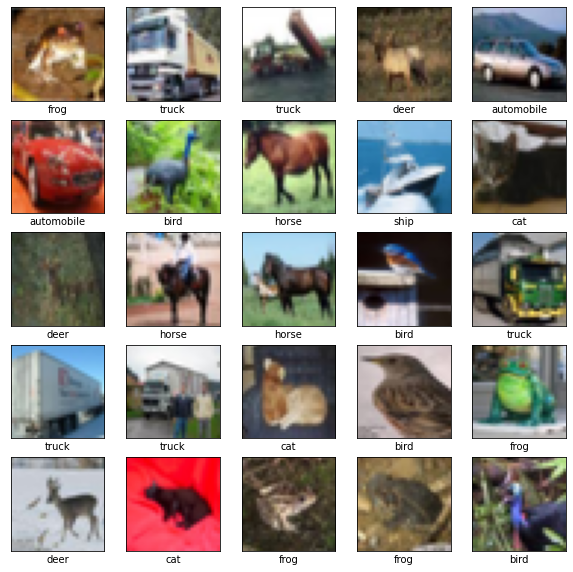

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Data Preprocessing

Data augmentation

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

We will implement data augmentation using experimental Keras Preprocessing Layers. These can be included inside your model like other layers, and run on the GPU.

In [61]:
img_height = 32
img_width = 32

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#### CNN Model creation using existing use case

In [63]:
num_classes = 10

In [64]:
model1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

compile and train the model

In [65]:
model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [66]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)         

Fit the model

In [67]:
batch_size = 32
epochs = 10

In [68]:
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 1.6240 - accuracy: 0.4126 - val_loss: 1.4199 - val_accuracy: 0.4964
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3401 - accuracy: 0.5228 - val_loss: 1.2449 - val_accuracy: 0.5553
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2436 - accuracy: 0.5565 - val_loss: 1.1039 - val_accuracy: 0.6063
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1706 - accuracy: 0.5836 - val_loss: 1.0752 - val_accuracy: 0.6226
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1192 - accuracy: 0.6055 - val_loss: 1.0182 - val_accuracy: 0.6464
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0832 - accuracy: 0.6189 - val_loss: 0.9987 - val_accuracy: 0.6447
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0480 - accuracy: 0.6317 - val_loss: 0.9196 - val_ac

#### Model evaluation

In [69]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.43%


#### Visualize the results

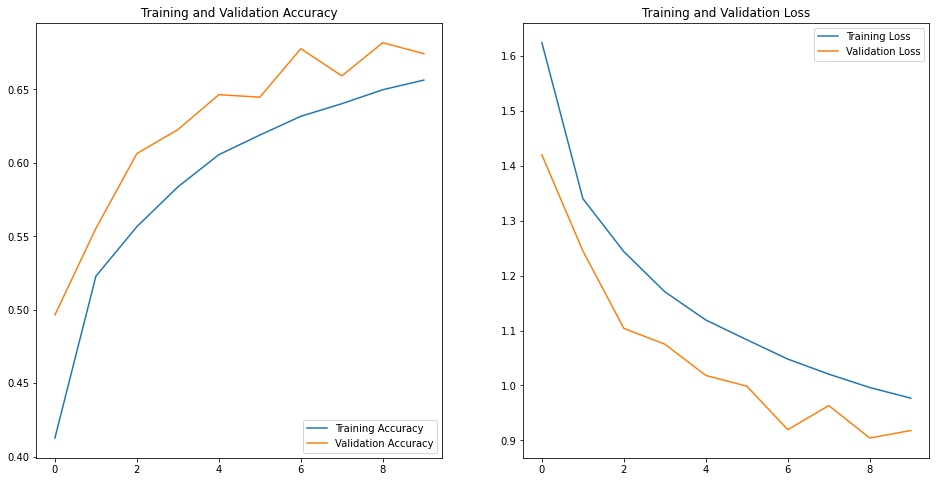

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model 2 with changes in hyperparameter

In [71]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [72]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

* For building the Model - CNN, Maxpooling and Dense Layers.
* For Activation Function - ReLU (in CNN layers for handling image pixels) and Softmax (for final classification).
* For handling Overfitting (Regularizing) - DropOut Layer.
* For normalizing/standardizing the inputs between the layers (within the network) and hence accelerating the training, providing regularization and reducing the generalization error - Batch Normalization Layer.

In [73]:
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.3),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.5),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.5),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

In [74]:
# compile model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)      

#### Fit the Model

In [76]:
batch_size = 64
epochs = 100

In [77]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = batch_size, epochs=epochs)

Epoch 1/100
782/782 [==============================] - 24s 28ms/step - loss: 1.8735 - accuracy: 0.3552 - val_loss: 1.4780 - val_accuracy: 0.4622
Epoch 2/100
782/782 [==============================] - 22s 28ms/step - loss: 1.4183 - accuracy: 0.4884 - val_loss: 1.4629 - val_accuracy: 0.5198
Epoch 3/100
782/782 [==============================] - 21s 27ms/step - loss: 1.2571 - accuracy: 0.5525 - val_loss: 1.5880 - val_accuracy: 0.4868
Epoch 4/100
782/782 [==============================] - 21s 26ms/step - loss: 1.1460 - accuracy: 0.5967 - val_loss: 1.0456 - val_accuracy: 0.6328
Epoch 5/100
782/782 [==============================] - 21s 26ms/step - loss: 1.0702 - accuracy: 0.6244 - val_loss: 1.1000 - val_accuracy: 0.6066
Epoch 6/100
782/782 [==============================] - 21s 27ms/step - loss: 1.0257 - accuracy: 0.6428 - val_loss: 0.9322 - val_accuracy: 0.6797
Epoch 7/100
782/782 [==============================] - 21s 27ms/step - loss: 0.9807 - accuracy: 0.6599 - val_loss: 0.7886 - val_ac

#### Model Evaluation

In [78]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 85.29%


#### Visualize the results

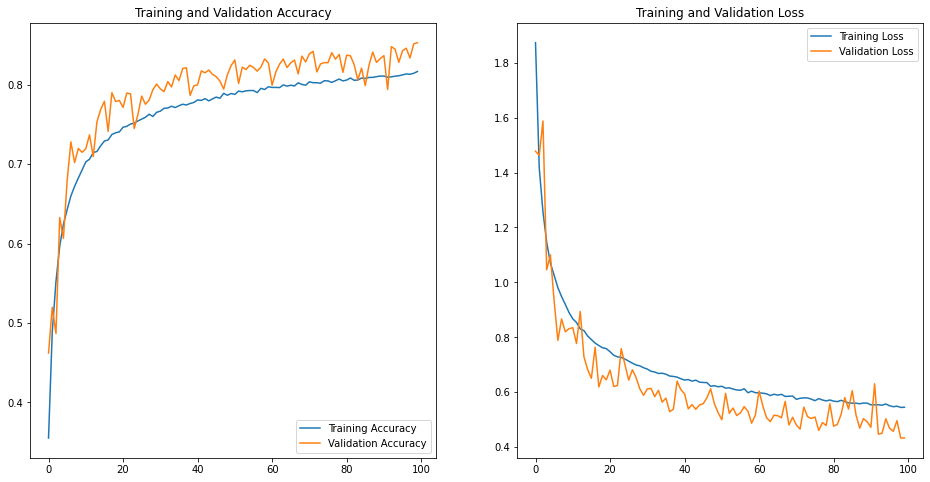

In [79]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()